**Logistics regression** : it is a type of regression analysis, where the dependent variable (the thing we are trying to predict) is categorical in nature.

For example: Spam/Not Spam or Yes/No

- Dependent Variables : (The variable which we are trying to predict). It will be categroical.
- Independent Variable :  These are the variables that we belive that will influence the dependent variable.
- Log Odds : Instead of predicting the actual outcome directly, logisitics regression models the log odds outcome. i.e. it predicts the likelihood of the event to happen.

**Logistic regression uses the log function (also known as sigmoid function) to map the predicted values to probablities between 0 and 1**


**Log function looks like an S shaped curve and it transforms the output of the linear regression into probablities**


**Binary Classification Problem** : To predict 2 classes ( 0 or 1)  - Binary Log Regression

**Multiple Class** : Multinomial Logistic Regression (3 or more classes)

linear : b0+b1.X
sigmoid

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic_df = pd.read_csv('titanic.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
177/891

0.19865319865319866

In [9]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

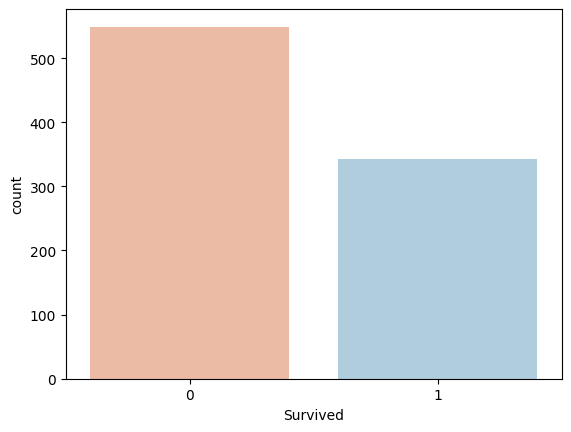

In [10]:
sns.countplot(data=titanic_df,x="Survived",palette="RdBu")

<Axes: xlabel='Survived', ylabel='count'>

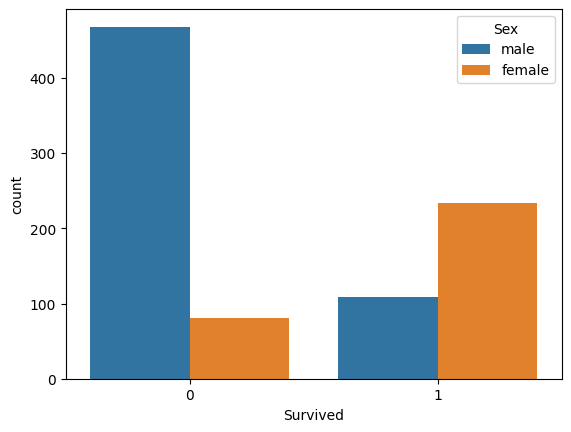

In [11]:
sns.countplot(data=titanic_df,x="Survived",hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

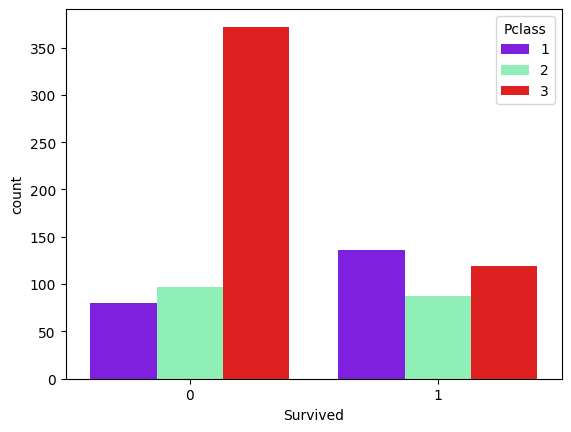

In [12]:
sns.countplot(data=titanic_df,x="Survived",hue="Pclass",palette='rainbow')

In [13]:
len(titanic_df[titanic_df['Pclass'] == 3])

491

In [14]:
len(titanic_df[titanic_df['Pclass'] == 2])

184

In [15]:
len(titanic_df[titanic_df['Pclass'] == 1])

216

In [17]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
len(titanic_df)

891

In [19]:
177/891

0.19865319865319866

In [20]:
687/891

0.7710437710437711

In [21]:
2/891

0.002244668911335578

In [22]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [23]:
titanic_df['Age'].median()

28.0

In [24]:
titanic_df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [28]:
titanic_df[titanic_df['Sex']=='male']['Age'].mean()

np.float64(30.72664459161148)

In [29]:
titanic_df[titanic_df['Sex']=='female']['Age'].mean()

np.float64(27.915708812260537)

FC : 
Economy
Second Class

In [30]:
titanic_df[titanic_df['Pclass']==1]['Age'].mean()

np.float64(38.233440860215055)

In [31]:
titanic_df[titanic_df['Pclass']==2]['Age'].mean()

np.float64(29.87763005780347)

In [32]:
titanic_df[titanic_df['Pclass']==3]['Age'].mean()

np.float64(25.14061971830986)

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
cols --> [19,'1']

In [35]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if(pd.isnull(age)):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [36]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(fill_age,axis=1)

In [39]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

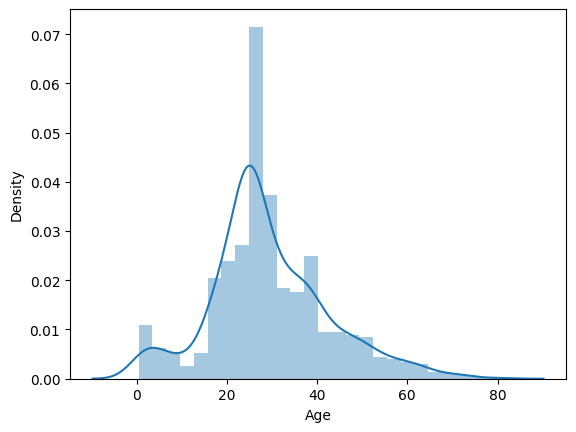

In [38]:
sns.distplot(titanic_df['Age'])

In [40]:
687/881

0.7797956867196367

In [42]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [46]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [45]:
titanic_df['Embarked'].fillna('S',inplace=True)

**ML Model**

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [49]:
X = titanic_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

y = titanic_df['Survived']

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [54]:
catcol = X.select_dtypes(include='object')

In [55]:
catcol

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [57]:
for item in catcol:
    X[item] = le.fit_transform(X[item])

In [58]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,25.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [61]:
len(Xtrain)

623

In [62]:
len(Xtest)

268

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logreg = LogisticRegression()

In [65]:
logreg.fit(Xtrain,ytrain) #fiiting model 

LogisticRegression()

In [66]:
ypred = logreg.predict(Xtest)

In [67]:
ypred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

1. Confusion Matrix
2. Classification Report
3. accuracy score

<img src="https://www.blog.trainindata.com/wp-content/uploads/2024/09/confusion-matrix-1.png">

False Positive : Type 1 Error

False Negative : Type 2 Error

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(ytest,ypred)

In [70]:
cm

array([[145,  21],
       [ 30,  72]])

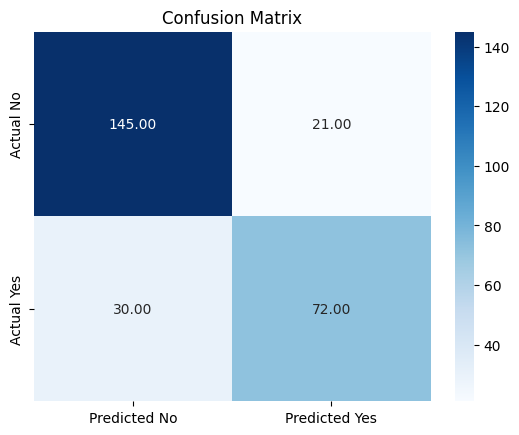

In [73]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f',xticklabels=['Predicted No','Predicted Yes'],
           yticklabels=['Actual No','Actual Yes'])

plt.title('Confusion Matrix')

plt.show()

In [74]:
145+72

217

In [75]:
len(ypred)

268

In [76]:
217/268

0.8097014925373134

In [77]:
51/268

0.19029850746268656